# IMPORT LIBRARIES

In [2]:
# Libraries for Keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.optimizers import Adam

# Another
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import os
from sklearn.metrics import accuracy_score

# LOAD DATA TO TRAIN

In [3]:
# Define
## Constant
### Input Image Size
height = 32
width = 32
channels = 3
### Class Amount
classes = 43
### Ratio to split Data Train into 2 part Train and Val: 80% to train and 20% to val.
ratio = 0.2

## Variable
data=[]
labels=[]

# Main
## Reading the input images and putting them into a numpy array
for i in range(classes) :
    path = "./input/train/{0}/".format(i)
    print("Load Data class {}".format(i))
    Class=os.listdir(path)
    for a in Class:
        try:
            image=cv2.imread(path+a)
            image_from_array = Image.fromarray(image, 'RGB')
            size_image = image_from_array.resize((height, width))
            data.append(np.array(size_image))
            labels.append(i)
        except AttributeError:
            print(" ")            
Cells=np.array(data)
labels=np.array(labels)

## Randomize the order of the input images
s=np.arange(Cells.shape[0])
np.random.seed(classes)
np.random.shuffle(s)
Cells=Cells[s]
labels=labels[s]

## Spliting the images into train and validation sets 
(X_train,X_val)=Cells[(int)(ratio*len(labels)):],Cells[:(int)(ratio*len(labels))]
X_train = X_train.astype('float32')/255 
X_val = X_val.astype('float32')/255
(y_train,y_val)=labels[(int)(ratio*len(labels)):],labels[:(int)(ratio*len(labels))]
### Using one hote encoding for the train and validation labels
y_train = to_categorical(y_train, classes)
y_val = to_categorical(y_val, classes)

print("Load Data Success")

Load Data class 0
Load Data class 1
Load Data class 2
Load Data class 3
Load Data class 4
Load Data class 5
Load Data class 6
Load Data class 7
Load Data class 8
Load Data class 9
Load Data class 10
Load Data class 11
Load Data class 12
Load Data class 13
Load Data class 14
Load Data class 15
Load Data class 16
Load Data class 17
Load Data class 18
Load Data class 19
Load Data class 20
Load Data class 21
Load Data class 22
Load Data class 23
Load Data class 24
Load Data class 25
Load Data class 26
Load Data class 27
Load Data class 28
Load Data class 29
Load Data class 30
Load Data class 31
Load Data class 32
Load Data class 33
Load Data class 34
Load Data class 35
Load Data class 36
Load Data class 37
Load Data class 38
Load Data class 39
Load Data class 40
Load Data class 41
Load Data class 42
Load Data Success


# DEFINITION OF THE LENET 5 MODEL

In [4]:
model = Sequential()
# Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6. Activation = RELU.
model.add(Conv2D(filters=6, kernel_size=(5,5),strides=1, padding='valid', activation='relu', input_shape=X_train.shape[1:]))
# Pooling. Input = 28x28x6. Output = 14x14x6.
model.add(MaxPool2D(pool_size=(2, 2),strides=2, padding='valid'))
# Layer 2: Convolutional. Output = 10x10x16. Activation = RELU.
model.add(Conv2D(filters=16, kernel_size=(5,5),strides=1, padding='valid', activation='relu'))
# Pooling. Input = 10x10x16. Output = 5x5x16.
model.add(MaxPool2D(pool_size=(2, 2),strides=2, padding='valid'))
# Flatten. Input = 5x5x16. Output = 400.
model.add(Flatten())
# Layer 3: Fully Connected. Input = 400. Output = 120. Activation = RELU.
model.add(Dense(120, activation='relu'))
# Layer 4: Fully Connected. Input = 120. Output = 84. Activation = RELU.
model.add(Dense(84, activation='relu'))
# Layer 5: Fully Connected. Input = 84. Output = 43.
model.add(Dense(43, activation='softmax'))

model.build()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         456       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_2 (Dense)              (None, 84)               

# TRAIN MODEL

In [5]:
# Define
## Contant
EPOCHS = 50
BATCH_SIZE = 200
## Compilation of the model
adam = Adam(lr=0.002)
model.compile(
    loss='categorical_crossentropy', 
    optimizer=adam, 
    metrics=['accuracy']
)

# Main
## Train model
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,validation_data=(X_val, y_val))

Train on 31368 samples, validate on 7841 samples
Epoch 1/50
31368/31368 [==============================] - 9s 276us/step - loss: 1.9778 - accuracy: 0.4744 - val_loss: 0.9203 - val_accuracy: 0.7410
Epoch 2/50
31368/31368 [==============================] - 8s 266us/step - loss: 0.6719 - accuracy: 0.8070 - val_loss: 0.6912 - val_accuracy: 0.8017
Epoch 3/50
31368/31368 [==============================] - 8s 266us/step - loss: 0.4376 - accuracy: 0.8764 - val_loss: 0.4204 - val_accuracy: 0.8792
Epoch 4/50
31368/31368 [==============================] - 8s 269us/step - loss: 0.3194 - accuracy: 0.9075 - val_loss: 0.3334 - val_accuracy: 0.9097
Epoch 5/50
31368/31368 [==============================] - 8s 270us/step - loss: 0.2472 - accuracy: 0.9281 - val_loss: 0.3028 - val_accuracy: 0.9189
Epoch 6/50
31368/31368 [==============================] - 8s 268us/step - loss: 0.1841 - accuracy: 0.9465 - val_loss: 0.2314 - val_accuracy: 0.9394
Epoch 7/50
31368/31368 [==============================] - 8s 26

# SUMMARIZE

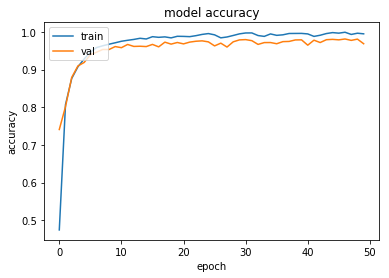

In [6]:
# summarize history for accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

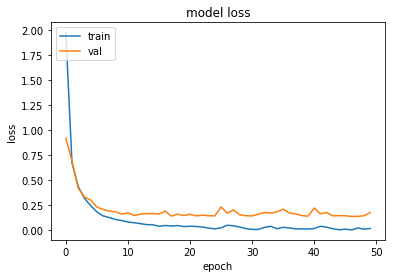

In [7]:
# summarize history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# PREDICT WITH THE TEST DATA AND SAVE MODEL

In [8]:
# Define
## Variable
data=[]

# Main
## Load Test Data
print("Load Test Data")
y_test=pd.read_csv("./input/Test.csv")
labels=y_test['Path'].values
y_test=y_test['ClassId'].values
for f in labels:
    path ='./input/test/'+f.replace('Test/', '')
    image=cv2.imread(path)
    image_from_array = Image.fromarray(image, 'RGB')
    size_image = image_from_array.resize((height, width))
    data.append(np.array(size_image))

X_test=np.array(data)
X_test = X_test.astype('float32')/255

## Predict
pred = model.predict_classes(X_test)
print("Test Accuracy: {0}".format(accuracy_score(y_test, pred)))

## Save Model
model.save("./model/model.h5")
print("Saved model to disk")

Load Test Data
Test Accuracy: 0.9050673000791766
Saved model to disk
